In [1]:
# AIM: To showcase the variance of Decision Trees
# PROCEDURE: Train separate DTs on two halves of the dataset and compare the inferences of each

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [27]:
# Prepare the data

In [16]:
df = pd.read_csv('../datasets/Heart.csv', index_col=0)

In [17]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [19]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [20]:
df['Ca'].value_counts()

Ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [21]:
df = pd.get_dummies(df, columns=['Sex', 'ChestPain', 'Fbs', 'RestECG', 'ExAng', 'Slope', 'Ca', 'Thal'], drop_first=True)

In [22]:
df

,Age,RestBP,Chol,MaxHR,Oldpeak,AHD,Sex_1,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,...,RestECG_1,RestECG_2,ExAng_1,Slope_2,Slope_3,Ca_1.0,Ca_2.0,Ca_3.0,Thal_normal,Thal_reversable
1,63,145,233,150,2.3,No,True,False,False,True,...,False,True,False,False,True,False,False,False,False,False
2,67,160,286,108,1.5,Yes,True,False,False,False,...,False,True,True,True,False,False,False,True,True,False
3,67,120,229,129,2.6,Yes,True,False,False,False,...,False,True,True,True,False,False,True,False,False,True
4,37,130,250,187,3.5,No,True,True,False,False,...,False,False,False,False,True,False,False,False,True,False
5,41,130,204,172,1.4,No,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,110,264,132,1.2,Yes,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
300,68,144,193,141,3.4,Yes,True,False,False,False,...,False,False,False,True,False,False,True,False,False,True
301,57,130,131,115,1.2,Yes,True,False,False,False,...,False,False,True,True,False,True,False,False,False,True
302,57,130,236,174,0.0,Yes,False,False,True,False,...,False,True,False,True,False,True,False,False,True,False


In [24]:
X = df.drop(columns='AHD')
y = df['AHD']

In [28]:
# Split the data into two equal halves

In [66]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=.5, random_state=101)

In [67]:
# Fit DTs to each half

In [68]:
def fit_tune(dt, X, y):
    grid_model = GridSearchCV(dt, { 'ccp_alpha': np.logspace(-4, 4, num=100) }, scoring='accuracy')
    grid_model.fit(X, y)
    print(grid_model.best_params_)
    plt.figure(figsize=(12, 5), dpi=200)
    plot_tree(grid_model.best_estimator_, feature_names=grid_model.feature_names_in_, class_names=grid_model.classes_)

{'ccp_alpha': 0.04641588833612782}


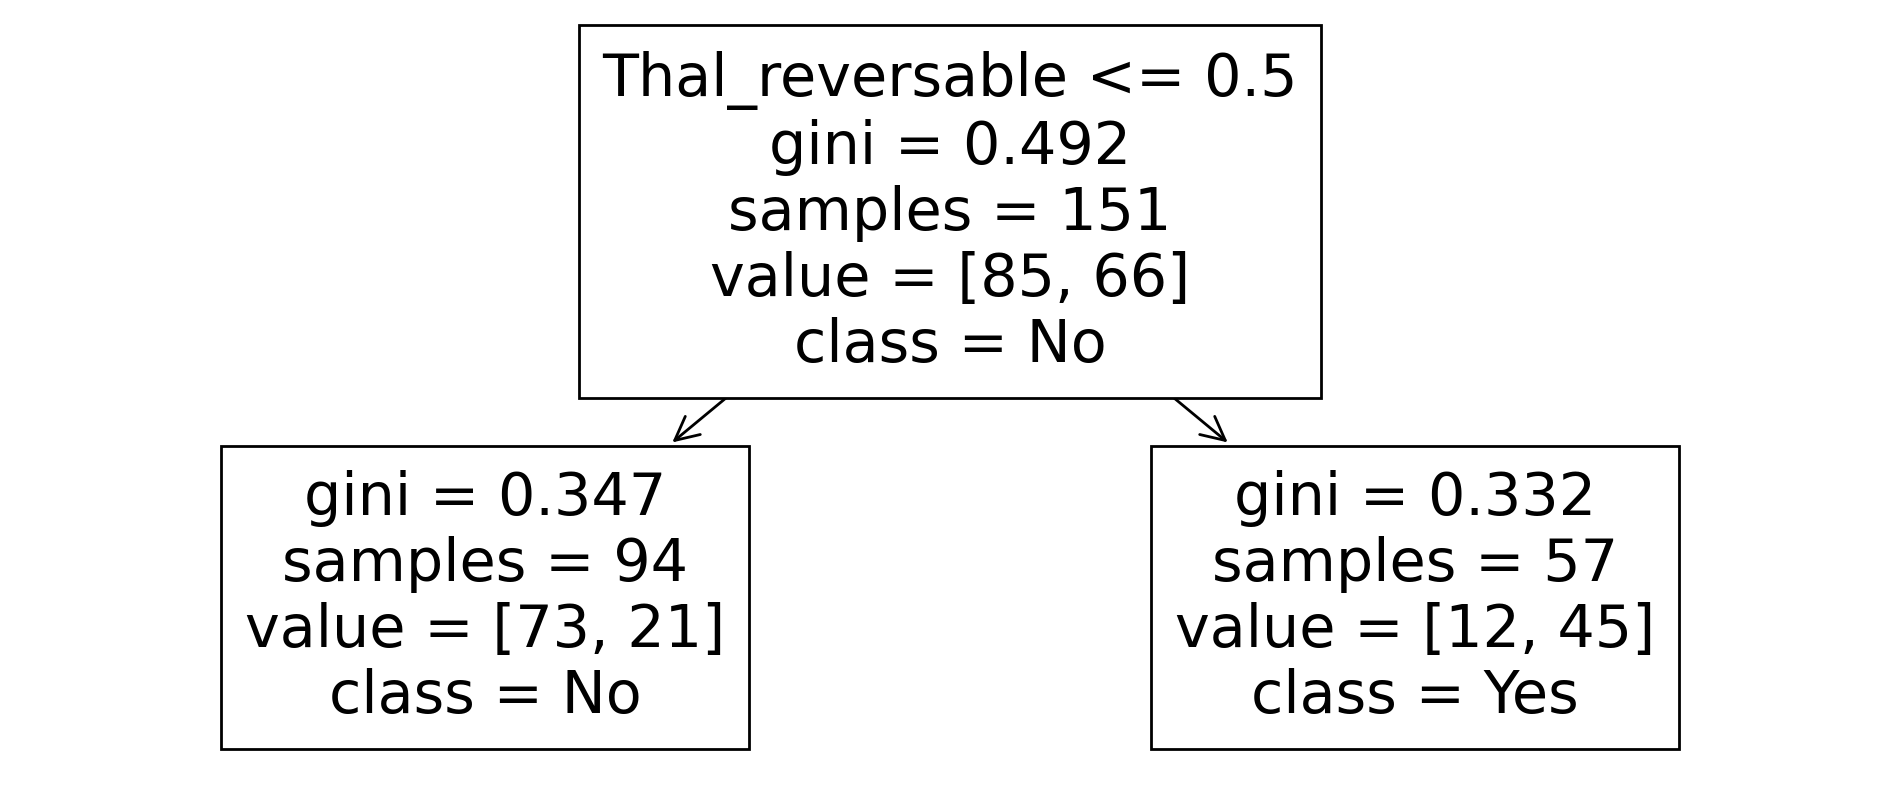

In [69]:
fit_tune(DecisionTreeClassifier(), X1, y1)

{'ccp_alpha': 0.0019630406500402726}


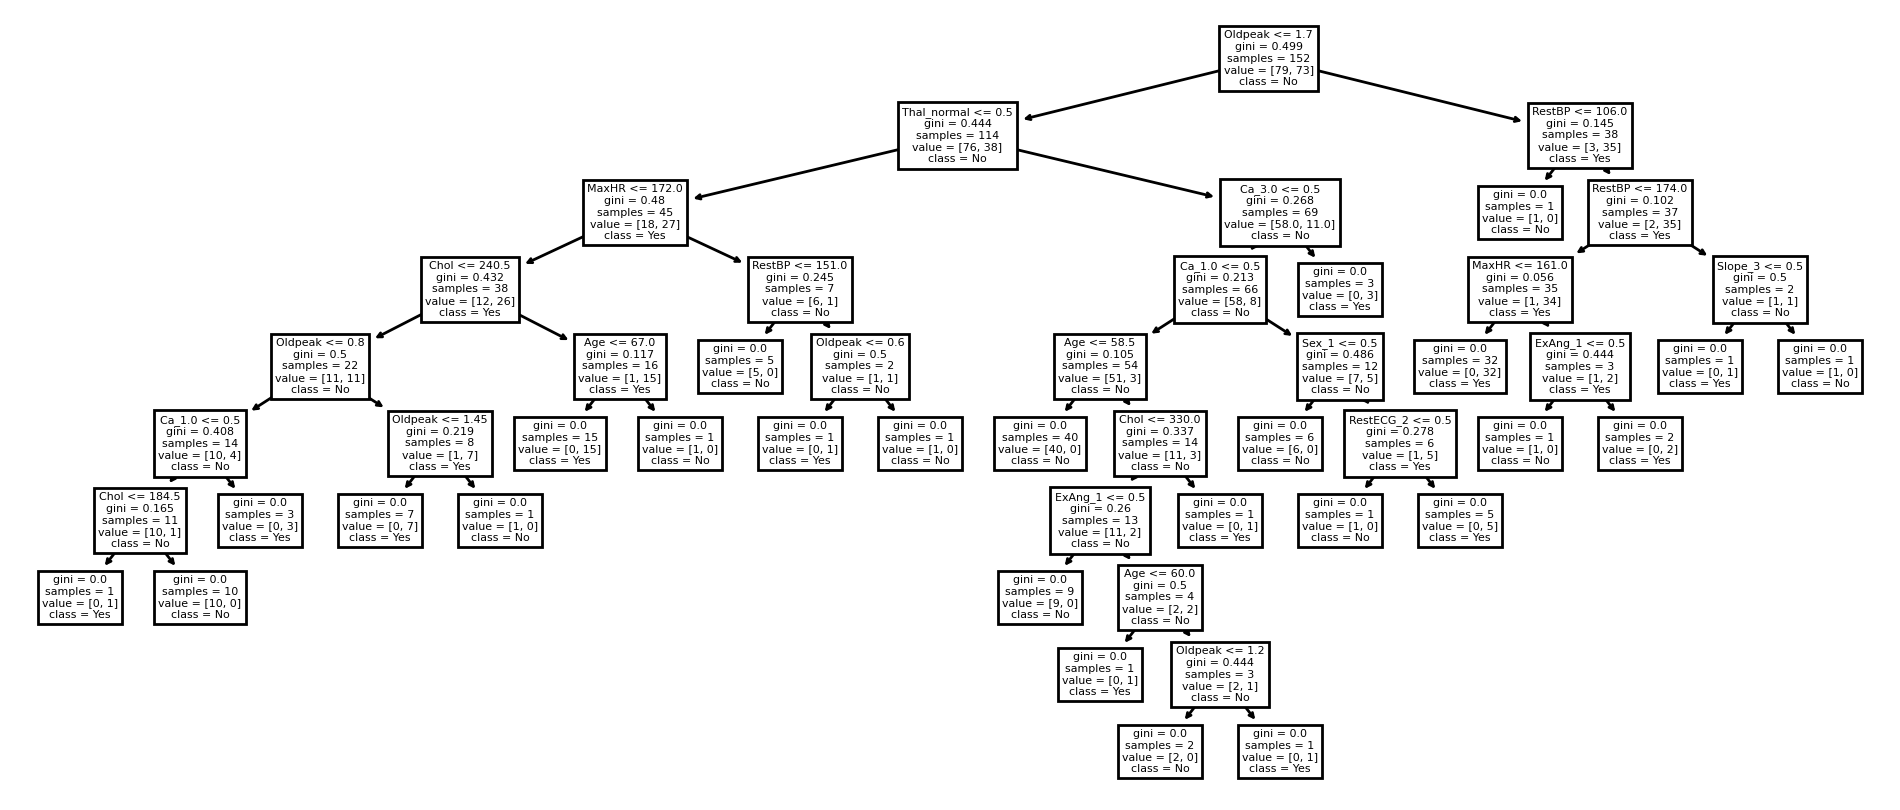

In [73]:
fit_tune(DecisionTreeClassifier(), X2, y2)

In [74]:
# Pretty different, huh?

In [75]:
# This is actuallu one of the more balanced seeds. I dare you to set random_state=42 in the train_test_split

In [76]:
# This demonstration clearly shows how Decision Trees overfit onto the training data